In [1]:
import numpy as np
import lbg_forecast.nz as nz
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
def plot_nzs(axes, nzs, mean, density, **kwargs):

    ndropouts = 3
    bin_step = 0.05
    bin_start = 0
    bin_end = 7

    bins = np.arange(bin_start, bin_end, bin_step)
    colours = ['blue', 'red', 'green']
    labels = ['u-dropouts', "g-dropouts", "r-dropouts"]


    samples=10
    grid = np.arange(bin_start, bin_end-bin_step, bin_step/samples)

    for drop in range(ndropouts):

        values = []
        for ind in range(nzs.shape[0]):
            hist = np.histogram(nzs[ind][drop], density=density, bins=bins)
            oversampled_values = np.repeat(hist[0], samples)
            values.append(oversampled_values)

        values = np.vstack((np.array(values)))
        mean_at_grid_point = np.mean(values, axis=0)
        percentile_at_point = np.percentile(values, [2, 50, 98], axis=0)
        if(mean):
            axes.plot(grid, mean_at_grid_point, c=colours[drop], **kwargs, label=labels[drop])
        axes.fill_between(grid, percentile_at_point[0, :], percentile_at_point[2, :], alpha=0.25, color=colours[drop])



    plt.legend(fontsize=24)
    plt.xlabel("redshift z", fontsize=24)
    plt.ylabel("p(z|cut, population, sps model ...)", fontsize=24)
    plt.tick_params('x', labelsize=24)
    plt.tick_params('y', labelsize=24)
    plt.ylim(0, 2.5)

In [3]:
nzs_mean = np.load("nz_samples/nz_hpc50mean.npy", allow_pickle=True)
nzs = np.load("nz_samples/nz_hpc50.npy", allow_pickle=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


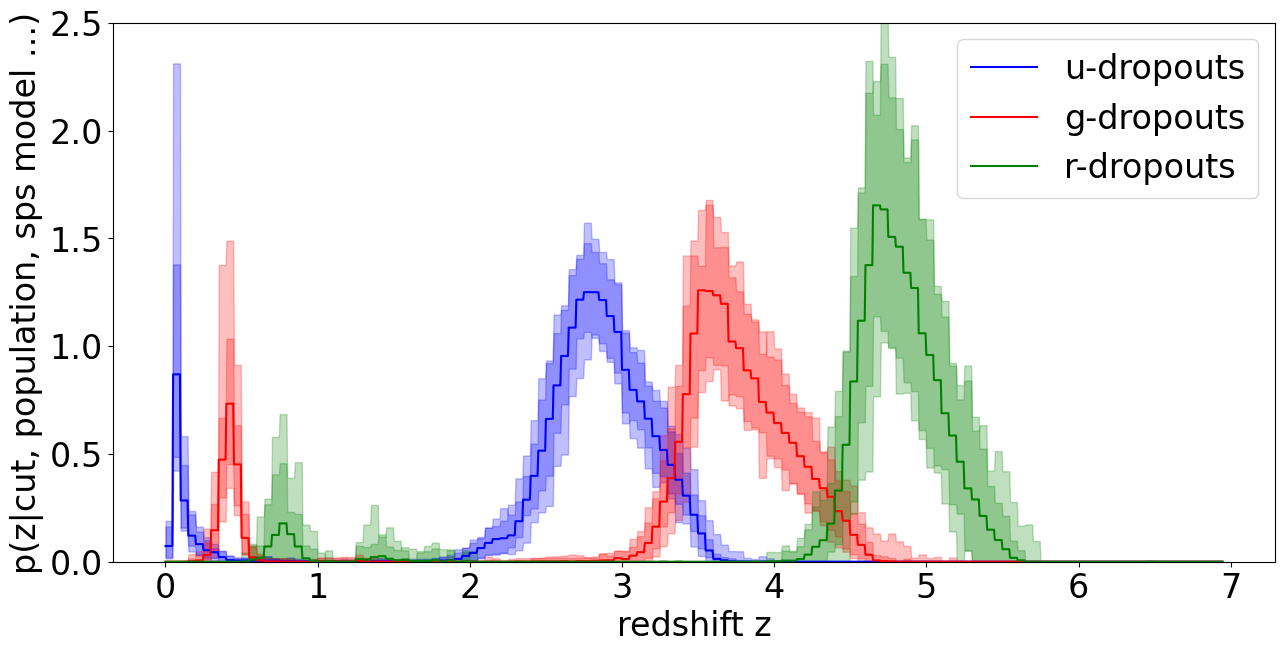

In [4]:
fig1, axes = plt.subplots(1, 1, figsize=(15,7), sharex=False, sharey=False)
plot_nzs(axes, nzs, mean=False, density=True)
plot_nzs(axes, nzs_mean, mean=True, density=True, ls='-')

In [5]:
print(nzs[0][0].shape, nzs_mean[0][0].shape)
print(nzs[0][1].shape, nzs_mean[0][1].shape)
print(nzs[0][2].shape, nzs_mean[0][2].shape)

(3138,) (2816,)
(1204,) (1291,)
(310,) (384,)
